### Импорты библиотек

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

### Задача
Изучается с.в. X - сумма очков, при вытягивание 3-х игральных карт, где цифры соответствуют своим значениям, В = 2, Д = 3, К = 4, Т = 11.

Проводится 100 независимых опытов



# * Теоретический результат

In [3]:
from fractions import Fraction as f
CARDS = [2, 3, 4, 6, 7, 8, 9, 10, 11]
def print_how_sum(num):
    ver = 0
    # Перебераем варианты для 3х карт
    for j1 in CARDS:
        for j2 in CARDS:
            for j3 in CARDS:
                # Считаем кол-во очков (порядок учитывается)
                sum = j1+j2+j3
                if sum == num:
                    # Смотрим сколько повторяющихся 
                    lj = len(set([j1, j2, j3]))
                    el_is = 36*35*34
                    if lj == 3: # без повтора
                        # Все 3 карты  разных мастей 
                        # 64 варианта расположить карты с достоинством j1, j2, j3
                        ver += f(4*4*4,el_is) 
                    elif lj == 2: # одно повторение
                        # Не может быть карты с одинаковым достоинством и мастью
                        # поэтому у двух карт произвольные масти
                        # у одной будет 1 недопустимый вариант
                        ver += f(4*4*3,el_is) 
                    elif lj == 1: # все одинаковые
                        # первая карта произвольной масти
                        # вторая любой кроме масти первого варианта
                        # третья любой кроме первой и второй 
                        ver += f(4*3*2,el_is)
    return ver
sum_ = 0
for i in range(6, 34):
    sum_ +=  print_how_sum(i)
    
df2 = pd.concat([pd.DataFrame([[i, print_how_sum(i)]], 
                              columns=['X','n']) for i in range(6, 34)],
          ignore_index=True)  
# Проверка:
sum_ == 1

plt2_x = df2['X']; plt2_y = df2['n']
df2.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
X,6,7,8,9,10,11,12,13,14,15,...,24,25,26,27,28,29,30,31,32,33
n,1/1785,2/595,4/595,1/105,6/595,4/255,3/119,4/119,24/595,88/1785,...,1/17,88/1785,24/595,61/1785,10/357,2/105,23/1785,4/595,2/595,1/1785


### *ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ С.В. Х

In [4]:
# Мат.ожидание
MX = 0 
for index, row in df2.iterrows():
    MX += row['X'] * row['n']

# Дисперсия
MX_1 = 0
for index, row in df2.iterrows():
    MX_1 += row['X'] ** 2 * row['n']
DX = MX_1 - MX**2

# Мода
ver_mx = df2['n'].max()
moda_row = df2[df2['n'] == ver_mx]['X']
ind = moda_row.index[0]
moda_tv = moda_row[ind]

# Медиана
df2['omega'] = 0
for i in df2.index:
    df2.loc[i, 'omega'] = df2['n'].loc[:i].sum()
mediana_tv = df2[df2['omega'] > 0.5].min()['X']

print(f"""
МХ = {round(float(MX),4)}
DX = {round(float(DX),4)}
с.к.о = {round(float(DX)**0.5,4)}
мода = {moda_tv}
медиана = {mediana_tv}
""")
# float(MX), float(DX), moda_tv, mediana_tv


МХ = 20.0
DX = 25.1429
с.к.о = 5.0143
мода = 21
медиана = 20



# 1.Результат эксперимента
Массив "а" является выборкой  

In [5]:
a = [27,9,26,18,
23,8,19,16,
21,24,23,18,
19,24,16,21,
23,17,24,19,
25,20,12,17,
27,24,8,16,
23,18,15,12,
16,24,14,23,
20,15,19,17,
25,24,18,23,
25,11,25,23,
19,24,22,21,
15,17,25,24,
15,25,25,19,
29,21,19,13,
28,13,16,18,
12,28,18,18,
24,14,18,18,
21,14,18,16,
17,22,24,22,
16,23,19,21,
15,14,16,22,
25,19,16,11,
21,23,19,26]
N = len(a)

# 2. Вариационный и статический ряды
### Вариационный ряд

In [6]:
a.sort()
for j in range(10):
    for i in range(int(N/10)):
        print(a[i+j*10], end=' ')
    print()

8 8 9 11 11 12 12 12 13 13 
14 14 14 14 15 15 15 15 15 16 
16 16 16 16 16 16 16 16 17 17 
17 17 17 18 18 18 18 18 18 18 
18 18 18 19 19 19 19 19 19 19 
19 19 19 20 20 21 21 21 21 21 
21 21 22 22 22 22 23 23 23 23 
23 23 23 23 23 24 24 24 24 24 
24 24 24 24 24 25 25 25 25 25 
25 25 25 26 26 27 27 28 28 29 


### Статистический ряд

In [7]:
unic_vals = list(set(a))
count_unic_vals = [a.count(val) for val in unic_vals]
unic_vals.sort()
df = pd.DataFrame(np.array([unic_vals,count_unic_vals]).T, columns=['X','n'])
df

,X,n
0,8,2
1,9,1
2,11,2
3,12,3
4,13,2
5,14,4
6,15,5
7,16,9
8,17,5
9,18,10


In [8]:
# Вариационный размах
var_step = df['X'].max() - df['X'].min()
print(f'Вариационный размах: {var_step}')
# Правило Стерджеса
inter_count = int(1 + 3.322 * math.log10(N))
print(f'Рекомендуемое число интервалов: {inter_count}')

# Выбранное количество и длина интервалов
inter_count = 6
inter_length = 4
print(f'Кол-во интервалов: {inter_count}')
print(f'Длина интервалов: {inter_length}')
print(f'Достаточно ли точек: {inter_count*inter_length == len(df)}')

Вариационный размах: 21
Рекомендуемое число интервалов: 7
Кол-во интервалов: 6
Длина интервалов: 4
Достаточно ли точек: False


In [9]:
df_2 = pd.DataFrame([[10, 0], [30, 0], [31, 0]],columns=['X', 'n'])
df = pd.concat([df, df_2])
df = df.sort_values('X').reset_index(drop=True)
print(f'Достаточно ли точек: {inter_count*inter_length == len(df)}')

Достаточно ли точек: True


### Проверка

In [10]:
# Проверка
df['n'].sum() == N

True

### Интервальный статистический ряд

In [11]:
x0 = df['X'][0]
cols = [] # интервалы
data_n = [] # сумма n в этих интервалах
for count in range(inter_count):
    ind_left = count*inter_length
    ind_right = (count+1)*inter_length-1
    data_n.append(df['n'].loc[ind_left:ind_right].sum())
    if count != (inter_count-1):
        cols.append(f"[{x0+ind_left}-{x0+ind_right+1})")
    else:
        cols.append(f"[{x0+ind_left}-{x0+ind_right+1}]")


In [12]:
# df для интервального статистического ряда
df_stat = pd.DataFrame(np.array([data_n]).T,columns=['ni*'])
n_series = pd.Series(data_n)
interv_series = pd.Series(cols)
df_test = pd.DataFrame(np.array([interv_series, n_series]).T, 
                       columns=['Ci-Ci+1','ni*'])
df_test

,Ci-Ci+1,ni*
0,[8-12),5
1,[12-16),14
2,[16-20),34
3,[20-24),22
4,[24-28),22
5,[28-32],3


### Проверка на кол-во значений

In [13]:
df_stat['ni*'].sum() == N

True

# 3.Таблица частот
### Образуем финальную для третьего шага табличку
- номер
- границы интервалов
- середина каждого интервала
- частота
- накопительная частота
- относительная частота
- накопительная относительная частота

### Середина каждого отрезка

In [14]:
ni_column = df_stat['ni*']
x0 = df['X'].min()

# Середина каждого отрезка
mid_of_inters = [x0+inter_length*(i+0.5) for i in range(inter_count)] 
mid_of_inters


### Считаем накопительную частоту

In [15]:
saving_sum = []
for col in range(inter_count):
    sum_ = ni_column.loc[:col].sum()
    saving_sum.append(sum_)
saving_sum



[5, 19, 53, 75, 97, 100]

### Считаем относительную частоту

In [16]:
rel_rate = []
for col in range(inter_count):
    rel_rate.append(ni_column[col] / N)
rel_rate

### Считаем накопительную относительную частоту

In [17]:
rel_saving_rate = [el / N for el in saving_sum]
rel_saving_rate

### Результат

In [18]:
indexs = [i for i in range(1,inter_count + 1)]

final_df = pd.DataFrame(np.array([
                            interv_series,
                            mid_of_inters,
                            ni_column,
                            saving_sum,
                            rel_rate,
                            rel_saving_rate
                                ]).T, 
                        columns=[
                            'Ci-Ci+1',
                            'xi*',
                            'ni*',
                            'mi',
                            'omegai',
                            'omegai*'
                        ], 
                        index=indexs)
final_df

,Ci-Ci+1,xi*,ni*,mi,omegai,omegai*
1,[8-12),10,5,5,0.05,0.05
2,[12-16),14,14,19,0.14,0.19
3,[16-20),18,34,53,0.34,0.53
4,[20-24),22,22,75,0.22,0.75
5,[24-28),26,22,97,0.22,0.97
6,[28-32],30,3,100,0.03,1


# 4. Построение гистограммы и полигон частот
### Полигон частот

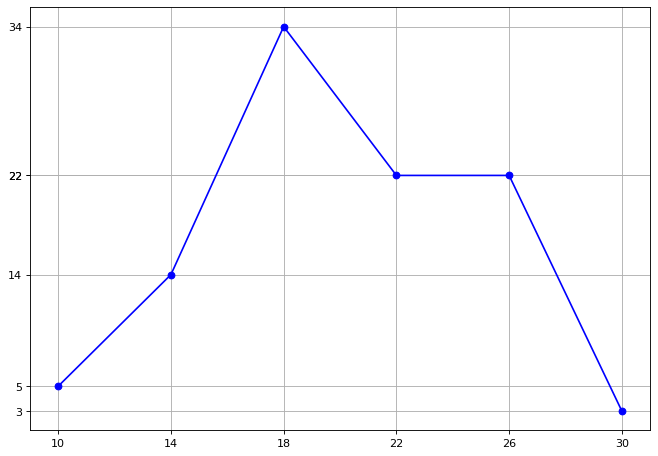

In [19]:
plt_x = final_df['xi*']; plt_y = final_df['ni*']
fig, ax = plt.subplots(figsize=(10, 7), dpi= 80)
plt.plot(plt_x, plt_y,'b-o')
plt.xticks([i for i in plt_x])
plt.yticks([i for i in plt_y])
plt.grid()

### Гистограмма

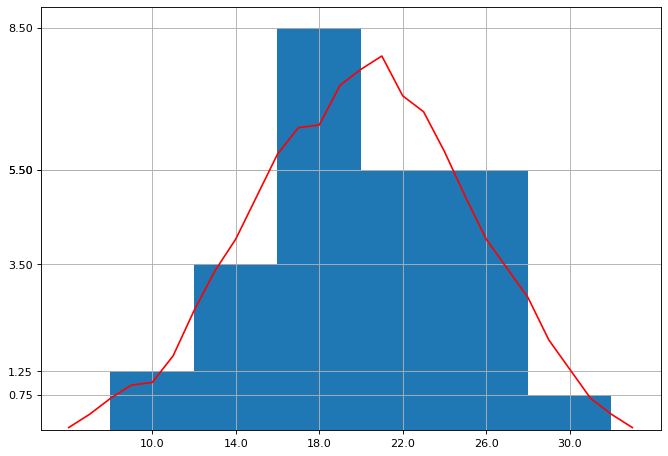

In [20]:
fig, ax = plt.subplots(figsize=(10, 7), dpi= 80)
plt.bar(plt_x, plt_y/inter_length, width = inter_length, tick_label=final_df['xi*']) # Отрисовываем гистограмму 
plt.plot(plt2_x, plt2_y*N, 'r') # Отрисовываем вероятностный закон
plt.yticks([ i/inter_length for i in plt_y])
plt.grid()
plt.show()


# 5. Эмпирическая функция распределения

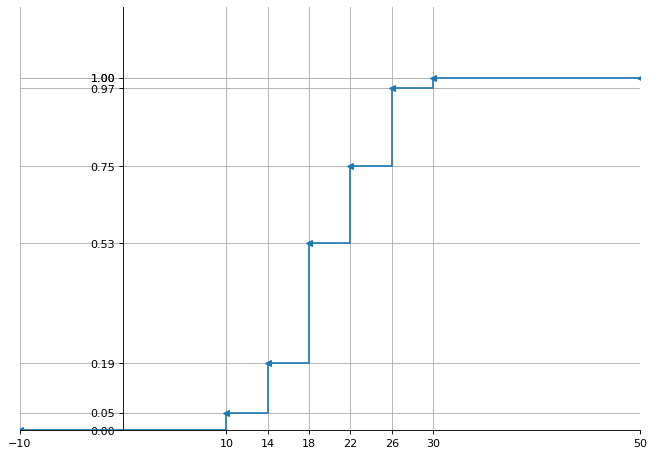

In [21]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=80)

# # Установка левой грани в 0
ax.spines['left'].set_position('zero')
 
# # убираем правую и верхную грани
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

# # Устанавливаем предельные значения для осей
ax.axis([-5, 40, 0, 1.2])

# Создаём дополнительный dataframe для правильной отрисовки ф-и распределения
rasp = pd.concat([
    pd.DataFrame([[-10, 0]], columns=['xi*','omegai*']), 
    final_df[['xi*','omegai*']], 
    pd.DataFrame([[50, 1]], columns=['xi*','omegai*'])
])

# Отрисовываем ф-и распределения
plt.step(rasp['xi*'], rasp['omegai*'], '<-', where='post')
plt.xticks([i for i in rasp['xi*']])
plt.yticks([i for i in rasp['omegai*']])
plt.grid()
plt.show()


$$F(x) =\begin{cases} 0,&  при \; x \leq 10,\\
0.05,&  при \;10 \le x \leq 14,\\
0.19,&  при \;14 \le x \leq 18,\\
0.53,&  при \;18 \le x \leq 22,\\
0.75,&  при \;22 \le x \leq 26,\\
0.97,&  при \;26 \le x \leq 30,\\
1  ,&  при \;30 \le x
\end{cases}$$

# 6.Вычислить среднее и дисперсию, к-ты асимметрии и эксцесса для группированной выборки

In [22]:
final_df[['xi*','ni*']] 

,xi*,ni*
1,10,5
2,14,14
3,18,34
4,22,22
5,26,22
6,30,3


### Вспомогательная таблица

In [23]:
rez_df = final_df[['xi*','ni*']].copy() # Копия таблицы

xi_series = final_df['xi*'] # столбец середин отрезка
ni_series = final_df['ni*'] # столбец частоты на отрезках
rez_df["xi*ni"]  = xi_series * ni_series # Столбец середин отрезков умноженных на их частоты

xi_sum = xi_series.sum() 
ni_sum = ni_series.sum() 
xi_ni_sum = rez_df["xi*ni"].sum() # Считаем сумму для столбца перемноженных значений (см. xi*ni столбец)

x_avg = xi_ni_sum/ni_sum # Среднее 

rez_df["xi-xavg"] = xi_series - x_avg 
xi_xavg = rez_df["xi-xavg"] 

# столбец для момента 1-го порядка
rez_df["(xi-xavg)ni"] = xi_xavg * ni_series

# столбец для момента 2-го порядка
rez_df["(xi-xavg)^2ni"]  = xi_xavg**2 * ni_series

# столбец для момента 3-го порядка
rez_df["(xi-xavg)^3ni"]  = xi_xavg**3 * ni_series

# столбец для момента 4-го порядка
rez_df["(xi-xavg)^4ni"]  = xi_xavg**4 * ni_series

rez_df

,xi*,ni*,xi*ni,xi-xavg,(xi-xavg)ni,(xi-xavg)^2ni,(xi-xavg)^3ni,(xi-xavg)^4ni
1,10,5,50,-10.04,-50.2,504.008,-5060.24,50804.8
2,14,14,196,-6.04,-84.56,510.742,-3084.88,18632.7
3,18,34,612,-2.04,-69.36,141.494,-288.649,588.843
4,22,22,484,1.96,43.12,84.5152,165.65,324.674
5,26,22,572,5.96,131.12,781.475,4657.59,27759.2
6,30,3,90,9.96,29.88,297.605,2964.14,29522.9


### Мода

In [24]:
df_mod = final_df[['Ci-Ci+1','xi*','ni*']] # Создаём новый df для моды
n_mod = df_mod['ni*'].max() # находим максмальную частоту
x_mod = df_mod[df_mod['ni*'] == n_mod] # находим строку максимальной частоты
x_row_index = x_mod.index[0] # И находим её индекс
mod_row_down = df_mod[df_mod['ni*'].index == x_row_index - 1] # находим строку ниже 
mod_row_up = df_mod[df_mod['ni*'].index == x_row_index + 1] # находим строку выше

ind_1 = mod_row_down.index[0] # поле index у Series имеет свой собтсвенный тип, поэтому достаю значение с помощью индексации
ind_2 = mod_row_up.index[0] 

n_mod_down = mod_row_down['ni*'][ind_1] # Находим частоту для строки ниже модальной 
n_mod_up = mod_row_up['ni*'][ind_2] # находим частоту для строки выше модальной

col_str = x_mod['Ci-Ci+1']

left_side = col_str[x_row_index].split('-')[0] # Достаём левую границу модального интервала
x_mod_min = int(left_side[1:]) # убираем скобку и превращаем в int
moda = x_mod_min + inter_length * ((n_mod - n_mod_down) / ((n_mod - n_mod_down) + (n_mod - n_mod_up)))
# формула для вычисления моды (см. презентация 'Лекция 2-3' слайд 49) 
moda

### Медиана

In [25]:
df_med = final_df[["Ci-Ci+1","xi*","ni*","mi"]]
x_med = df_med[df_med['mi'] > N/2].head(1) 
x_med_index = df_med[df_med['mi'] > N/2].index[0]
n_med = x_med['ni*'][x_med_index]
x_med_down = df_med[df_med['mi'].index == x_med_index - 1]
x_med_down_index = x_med_down.index[0]
m_med_down = x_med_down['mi'][x_med_down_index]
col_str = x_med['Ci-Ci+1']

left_side = col_str[x_med_index].split('-')[0] # Достаём левую границу медианного интервала
x_med_min = int(left_side[1:]) # убираем скобку и превращаем в int

mediana = x_med_min  + inter_length*(N/2 - m_med_down) / n_med
mediana

In [26]:
sum_1  = rez_df["(xi-xavg)ni"].sum() # Подбиваем суммы
sum_2  = rez_df["(xi-xavg)^2ni"].sum()
sum_3  = rez_df["(xi-xavg)^3ni"].sum()
sum_4  = rez_df["(xi-xavg)^4ni"].sum()

# Проверка
abs(sum_1) < 0.1e-10 # Проверка, с учетом накопительных ошибок
Dv = sum_2/N # Дисперсия 
mu3 = sum_3/N # момент 3-го порядка
mu4 = sum_4/N # момент 4-го порядка

sgmv = Dv ** (0.5) # С.К.О
As = mu3 / sgmv **3 # К-т асимметрии
Ek = mu4 / sgmv **4 - 3 #К-т эксцесса

S2 = round(N/(N-1)*float(Dv),4)
S = round((N/(N-1)*float(Dv))**0.5,4)
# x_avg, moda, mediana, Dv, sgmv, As, Ek

# 7.Анализ полученных результатов

In [27]:
print(f"""
N = {N}
= Группированная выборка = \t\t = числовые характеристики с.в.X =
========================== \t\t =================================
среднее = {x_avg}\t\t\t\t МХ = {round(float(MX),4)}
мода = {moda}\t\t\t\t мода = {moda_tv}
медиана = {round(float(mediana))} \t\t\t\t медиана = {mediana_tv}
DX = {round(float(Dv),4)} \t\t\t\t DX = {round(float(DX),4)}
с.к.о = {round(sgmv,4)} \t\t\t\t с.к.о = {round(float(DX)**0.5,4)}
к-т асимметрии = {round(float(As), 4)}
К-т эксцесса = {round(float(Ek), 4)}
S^2 = {S2}
S = {S}

""")


N = 100
= Группированная выборка = 		 = числовые характеристики с.в.X =
========================== 		 =================================
среднее = 20.04				 МХ = 20.0
мода = 18.5				 мода = 21
медиана = 20 				 медиана = 20
DX = 23.1984 				 DX = 25.1429
с.к.о = 4.8165 				 с.к.о = 5.0143
к-т асимметрии = -0.0579
К-т эксцесса = -0.6284
S^2 = 23.4327
S = 4.8407




In [28]:
import scipy.stats as st
import sympy as sp
from sympy.solvers import solve
sp.init_printing()

#  Интервальная оценка MX


    Уровень значимости = 0.05
    19.0795< MX < 21.0005
    

    Уровень значимости = 0.1
    19.2363< MX < 20.8437
    


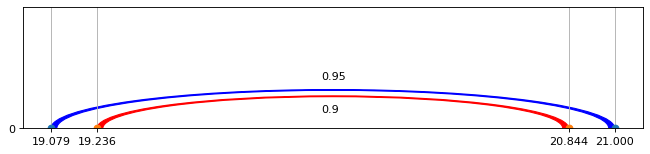

In [29]:
fig, ax = plt.subplots(figsize=(10, 2), dpi= 80)
ax.set_ylim([0, 3])

# Уровни значимости a (0.05 и 0.1)
sig_levs = [0.05, 0.1]


ticks = []
colors = ['b','r']

for sig_lev,color in zip(sig_levs,colors):
    t = st.t.ppf(1-sig_lev/2, N-1) # Распределение стьюдента
    x1 = round(x_avg-t*S/N**0.5, 4)
    x2 = round(x_avg+t*S/N**0.5, 4)
    plt.plot([x1, x2], [0, 0], 'o')
    
    center = (x2 + x1) / 2
    radius = x2 - center
    theta1, theta2 = 0, 180
    half_circle = Wedge((center, 0), radius, theta1, theta2,width=0.02,color=color)
    ax.add_artist(half_circle)
    
    ticks += [x1, x2]
    print(f"""
    Уровень значимости = {sig_lev}
    {x1}< MX < {x2}
    """)

ax.text(20, 1.2, '0.95')        
ax.text(20, 0.4, '0.9')    
    
plt.xticks(ticks)
plt.yticks([0])
plt.grid()

# Интервальная оценка DX


    Уровень значимости = 0.05
    18.0642< DX < 31.6222
    

    Уровень значимости = 0.1
    18.826< DX < 30.1096
    


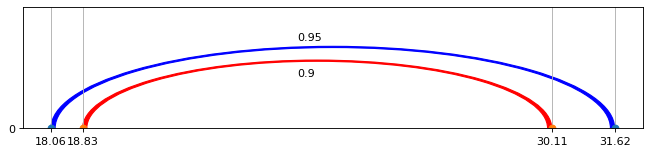

In [30]:
fig, ax = plt.subplots(figsize=(10, 2), dpi= 80)
ax.set_ylim([0, 10])

sig_levs = [0.05, 0.1]


ticks = []
colors = ['b','r']

for sig_lev,color in zip(sig_levs,colors):
    ch1 = st.chi2.ppf(1-sig_lev/2, N-1)
    ch2 = st.chi2.ppf(sig_lev/2, N-1)
    x1 = round((N-1)*S2/ch1, 4)
    x2 = round((N-1)*S2/ch2, 4)
    plt.plot([x1, x2], [0, 0], 'o')
    
    center = (x2 + x1) / 2
    radius = x2 - center
    theta1, theta2 = 0, 180
    half_circle = Wedge((center, 0), radius, theta1, theta2,width=0.1,color=color)
    ax.add_artist(half_circle)
    
    ticks += [x1, x2]
    print(f"""
    Уровень значимости = {sig_lev}
    {x1}< DX < {x2}
    """)

ax.text(24, 7.3, '0.95')        
ax.text(24, 4.3, '0.9')      
    
plt.xticks(ticks)
plt.yticks([0])
plt.grid()

# Метод моментов

$ X \sim R(0, \theta) $

$m_X = \frac{\theta}{2}$

$DX = \frac{\theta ^2 }{12}$

### Метод моментов 
#### Способ 1

$ \alpha_1  = \widetilde{\alpha_1}$.

$ \alpha_1 = m_X = \frac{\theta}{2};$

$ \widetilde{\alpha_1} = \frac{1}{n}\sum_{i=1}^{n}n_i x_i = \overline{x}$. 

$ \frac{\theta}{2} = \overline{x}$

$ \fbox{ $\theta = 2 \overline{x} $} $


# Метод максимального правдоподобия

$ \sim N(a, 1) $

Составляем функцию правдоподобия.
Подставляя в закон плотности распределения мат. ожидание (a) и дисперсию (1), произведение для каждого $x_i$


$ L(a) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} e^{-\frac{(x_i -a)^2}{2}}$


Логарифм от функции правдоподобия

$\widetilde{L(a)} = \ln(\prod_{i=1}^n \frac{1}{\sqrt{2\pi}} e^{-\frac{(x_i -a)^2}{2}}) = \ln(\prod_{i=1}^n \frac{1}{\sqrt{2\pi}}) + \ln( \prod_{i=1}^n e^{-\frac{(x_i -a)^2}{2}}) $

$\widetilde{L(a)} =  \ln(\prod_{i=1}^n \frac{1}{\sqrt{2\pi}}) +\sum_{i=1}^n \ln(e^{-\frac{(x_i -a)^2}{2}})$

$ \widetilde{L(a)} =  \ln(\prod_{i=1}^n \frac{1}{\sqrt{2\pi}}) -\frac{1}{2}\sum_{i=1}^n (x_i -a)^2 $

Находим частную производную по $a$

$\frac{\partial \widetilde{L(a)}}{\partial a} = -\frac{1}{2}\sum_{i=1}^n \frac{\partial (x_i -a)^2}{\partial a}$

$ \frac{\partial \widetilde{L(a)}}{\partial a} = \sum_{i=1}^n (x_i -a) = 0$

Из равенства $\sum_{i=1}^n (x_i -a) = 0$ получим

$ \sum_{i=1}^n (x_i)  -n \widetilde{a} = 0$

$ \fbox{ $ \widetilde{a} = \frac{1}{n} \sum_{i=1}^n x_i$ }$